In [114]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [115]:
bn=gum.BayesNet('FraudPredictor')
print("BN = ",bn)

BN =  BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0, mem: 0o}


In [116]:
# Adding variables 
user_behaviour=bn.add(gum.LabelizedVariable('UserBehavior','user_behaviour', ['suspicuous', 'normal']))
account_age=bn.add(gum.LabelizedVariable('AccountAge','account_age', ['new', 'old']))
georgraphic_location=bn.add(gum.LabelizedVariable('GeographicLocation', 'georgraphic_location', ['rural', 'urban']))
transaction_amount=bn.add(gum.LabelizedVariable('TransactionAmount', 'transaction_amount',['0-350000','350001-700000','700000+']))
transaction_info=bn.add(gum.LabelizedVariable('TransactionInfo', 'transaction_info', ['abnormal', 'normal']))
transaction_frequency=bn.add(gum.LabelizedVariable('TransactionFrequency', 'transaction_frequency', ['frequent', 'infrequent']))
likelihood_of_fraud=bn.add(gum.LabelizedVariable('LikelihoodOfFraud', 'likelihood_of_fraud', ['low', 'medium', 'high']))
print ("BN With vars : ",bn)


BN With vars :  BN{nodes: 7, arcs: 0, domainSize: 288, dim: 9, mem: 128o}


In [117]:
# Addding arcs between the transaction_amount
arcs = [(user_behaviour, likelihood_of_fraud),(account_age, user_behaviour), (transaction_info, likelihood_of_fraud), (transaction_frequency, transaction_info),(transaction_amount, transaction_info),(georgraphic_location, likelihood_of_fraud)]
for arc in arcs:
    bn.addArc(*arc)
bn

(pyAgrum.BayesNet<double>@0x7f87e005e400) BN{nodes: 7, arcs: 6, domainSize: 288, dim: 29, mem: 392o}

In [118]:
# Define the conditional probability tables 

bn.cpt('AccountAge').fillWith([0.35,0.65])
bn.cpt('TransactionFrequency').fillWith([0.92,0.08])
bn.cpt('TransactionAmount').fillWith([0.3,0.4,0.2])

bn.cpt('TransactionInfo')[{'TransactionAmount': 0, 'TransactionFrequency': 0}] = [1, 0]
bn.cpt('TransactionInfo')[{'TransactionAmount': 0, 'TransactionFrequency': 1}] = [0.75, 0.25]
bn.cpt('TransactionInfo')[{'TransactionAmount': 1, 'TransactionFrequency': 0}] = [0.35, 0.65]
bn.cpt('TransactionInfo')[{'TransactionAmount': 1, 'TransactionFrequency': 1}] = [0.175, 0.825]
bn.cpt('TransactionInfo')[{'TransactionAmount': 2, 'TransactionFrequency': 0}] = [0.05, 0.95]
bn.cpt('TransactionInfo')[{'TransactionAmount': 2, 'TransactionFrequency': 1}] = [0, 1]

bn.cpt('GeographicLocation').fillWith([0.33,0.67])

bn.cpt('UserBehavior')[{'AccountAge': 0}] = [0.6, 0.4]
bn.cpt('UserBehavior')[{'AccountAge': 1}] = [0.4, 0.6]


bn.cpt('LikelihoodOfFraud')[{'GeographicLocation': 0, 'TransactionInfo': 0, 'UserBehavior': 0}] = [0.0, 0.45, 0.55]
bn.cpt('LikelihoodOfFraud')[{'GeographicLocation': 0, 'TransactionInfo': 0, 'UserBehavior': 1}] = [0.1, 0.5, 0.4] 
bn.cpt('LikelihoodOfFraud')[{'GeographicLocation': 0, 'TransactionInfo': 1, 'UserBehavior': 0}] = [0.2, 0.5, 0.3]
bn.cpt('LikelihoodOfFraud')[{'GeographicLocation': 0, 'TransactionInfo': 1, 'UserBehavior': 1}] = [0.35, 0.5, 0.15]
bn.cpt('LikelihoodOfFraud')[{'GeographicLocation': 1, 'TransactionInfo': 0, 'UserBehavior': 0}] = [0.4, 0.475, 0.125]
bn.cpt('LikelihoodOfFraud')[{'GeographicLocation': 1, 'TransactionInfo': 0, 'UserBehavior': 1}] = [0.6, 0.3, 0.1]
bn.cpt('LikelihoodOfFraud')[{'GeographicLocation': 1, 'TransactionInfo': 1, 'UserBehavior': 0}] = [0.825, 0.125, 0.05]
bn.cpt('LikelihoodOfFraud')[{'GeographicLocation': 1, 'TransactionInfo': 1, 'UserBehavior': 1}] = [0.915, 0.075, 0.01]


In [119]:
# Showing the BN
bn
#bn.saveBIFXML("BN_model.bif")

(pyAgrum.BayesNet<double>@0x7f87e005e400) BN{nodes: 7, arcs: 6, domainSize: 288, dim: 29, mem: 392o}

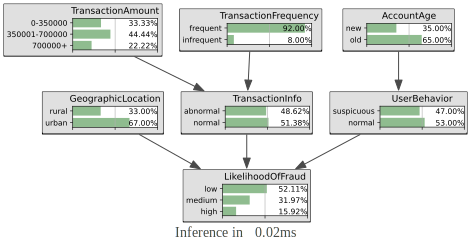

In [120]:
# Compute the posterior probability of the likelihood of dropout - inference
#ie.makeInference()
ie = gum.VariableElimination(bn)
gnb.showInference(bn, evs={}, engine=ie)


# Compile the Bayesian network 
ie = gum.LazyPropagation(bn)


# Set the evidence (observed nodes)
#ie.setEvidence({'Academic Performance': 'low'})
